In [90]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
# from scipy.interpolate import spline

In [91]:
df = pd.read_csv('headbrain.csv')
Head_Size_5 = df['Head Size(cm^3)'] ** 5
df.insert(0, 'Head_Size_5', Head_Size_5)
df.drop(['Gender', 'Age Range'], axis=1, inplace=True)
df.head()

,Head_Size_5,Head Size(cm^3),Brain Weight(grams)
0,1870016570386808832,4512,1530
1,729787608951051168,3738,1297
2,1404616193535657301,4261,1335
3,768661137275742657,3777,1282
4,1271517601131424657,4177,1590


In [92]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

In [93]:
X = df[:, :-1]
y = df[:, -1]

In [94]:
X1 = np.c_[np.ones((len(X), 1), dtype='int'), X[:, 1]]
theta1 = np.linalg.inv(X1.T @ X1) @ X1.T @ y
theta1

array([0.12809004, 0.78525187])

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape
X_train = np.c_[np.ones((len(X_train), 1), dtype='int'), X_train]
X_test = np.c_[np.ones((len(X_test), 1), dtype='int'), X_test]

In [96]:
def cost_func(theta, X, y):
    m = len(X)
    pred = X.dot(theta)
    cost = (1/m) * np.sum(np.square(pred - y))
    return cost**(1/2)

In [97]:
def gradientDescent(X_train, X_test, y_train, y_test, alpha, epochs, lmb):
    m = len(y_train)
    theta = np.zeros(X_train.shape[1]).T
    print(theta)
    rmse_train = np.empty(epochs)
    rmse_test = np.empty(epochs)
    it = np.arange(epochs)
    for i in range(epochs):
        pred = np.dot(X_train, theta)
        theta[1:] = theta[1:] - (1 / m) * alpha * ((X_train[:, 1:].T@(pred - y_train)) + (lmb * theta[1:]))
        theta[0] = theta[0] - (1 / m) * alpha * ((X_train[:, 0].T@(pred - y_train)))
        rmse_train[i] = cost_func(theta, X_train, y_train)
        rmse_test[i] = cost_func(theta, X_test, y_test)
    plt.plot(it, rmse_train, c='red', label='Training RMSE')
    plt.plot(it, rmse_test, c='green', label='Testing RMSE')
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()
    print(theta)
    return theta, rmse_train, rmse_test

[0. 0. 0.]


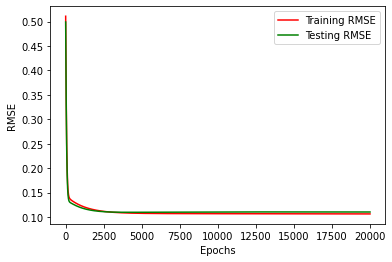

[0.16372122 0.2740483  0.56115758]


In [98]:
theta, rmse_train, rmse_test = gradientDescent(X_train, X_test, y_train, y_test, 0.01, 20000, 0)

In [99]:
theta, rmse_train

(array([0.16372122, 0.2740483 , 0.56115758]),
 array([0.5109582 , 0.50494557, 0.49901558, ..., 0.1062666 , 0.10626656,
        0.10626652]))

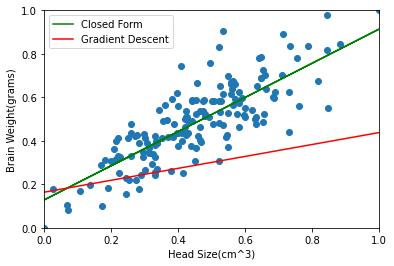

In [100]:
max_x = np.max(X_train[:, 1]) + 100
min_x = np.min(X_train[:, 1]) - 100
X_train1 = np.linspace(min_x, max_x, 1000)

X_train = X_train[:, -1] 
y_pred1 = theta1[0] + theta1[1] * X_train
y_pred = theta[0] + theta[1] * X_train1

plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred1, c='green', label='Closed Form')


plt.plot(X_train1, y_pred, label='Gradient Descent', c='red')
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.legend()
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()